In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline

['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']

---------------------------------------------

Is there any column with all unique values? False

---------------------------------------------

Physical Activity - Behavior        26628
Obesity / Weight Status             17920
Fruits and Vegetables - Behavior     8844
Name: Topic, dtype: int64

---------------------------------------------

Unique questions that contain the word fruit:
['Percent of adults who report consuming fruit less than one time

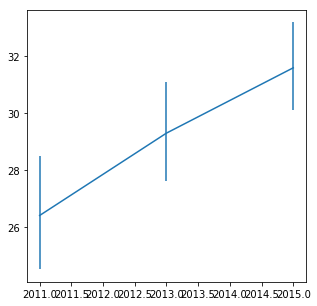

In [4]:
df = pd.read_csv('./data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

# 2.1 What are the column names?
print(df.columns.tolist())
print('\n---------------------------------------------\n')

# 2.2 Is there an explicit index?
dupl = [np.sum(df[col].duplicated().tolist()) == 0 for col in df.columns]
print('Is there any column with all unique values?', np.sum(dupl) > 0)
print('\n---------------------------------------------\n')

# 2.3 What are all the unique topics in the topics column?
print(df['Topic'].value_counts())
print('\n---------------------------------------------\n')

# 2.4 For surveys on Fruits, what are the unique questions?
fruit = df[df['Question'].str.upper().str.contains('FRUIT')] # upper to ignore spelling case
print('Unique questions that contain the word fruit:')
print(fruit['Question'].unique())
print('\n---------------------------------------------\n')

# 2.5 How many surveys have there been on fruit consumption in the state of Washington?
fruitWA = fruit[fruit['LocationAbbr'] == 'WA']
print('Number of surveys in WA about fruits:', len(fruitWA))

# Find out how many of the college graduates in the state of Washington consume fruits 
# less than 1 time a day
print(fruitWA['Education'].value_counts()) # "College graduate"
c_fruitWA = fruitWA[fruitWA['Education'] == 'College graduate']

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.errorbar(c_fruitWA['YearStart'], c_fruitWA['Data_Value'], 
            yerr = [abs(c_fruitWA['Low_Confidence_Limit']-c_fruitWA['Data_Value']), 
                    abs(c_fruitWA['High_Confidence_Limit ']-c_fruitWA['Data_Value'])])
plt.show()
plt.clf()
plt.close('all')

In [5]:
# 3.1 create a smaller dataFrame that only contains some studies
df_small = df[(df['YearStart'] == 2011) & (df['StratificationID1'] == 'OVERALL') & \
              (df['QuestionID'] == 'Q036') & (df['LocationAbbr'] != 'US')]

# 3.2 Sort the states for percentage of obese people (just to verify your later results)
print(df_small.sort_values(by='Data_Value', ascending=False)['LocationAbbr'].tolist())

['MS', 'LA', 'WV', 'AL', 'MI', 'OK', 'AR', 'IN', 'SC', 'TX', 'KY', 'MO', 'OH', 'KS', 'VA', 'TN', 'NC', 'IA', 'DE', 'PA', 'NE', 'MD', 'SD', 'GA', 'ND', 'ME', 'WI', 'AK', 'IL', 'ID', 'OR', 'FL', 'WA', 'NM', 'NH', 'MN', 'RI', 'VT', 'AZ', 'WY', 'MT', 'NV', 'CT', 'NY', 'UT', 'CA', 'NJ', 'DC', 'MA', 'HI', 'CO']


In [6]:
# 3.3 Install Chorogrid
from chorogrid import Colorbin, Chorogrid

# (3.4 optional) Come up with your own colorscheme on colorbrewer
mycolors = ["#FEEBE2", "#FBB4B9", "#F768A1", "#C51B8A", "#7A0177"]

# 3.5 Plot the choropleth using Chorogrid
states = df_small['LocationAbbr'].tolist()
mybin = Colorbin(df_small['Data_Value'], mycolors, proportional=True, decimals=None)
mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

cg = Chorogrid('./data/usa_states.csv', states, colors_by_state)
cg.set_legend(legend_colors, legend_labels, title='% of population')
cg.draw_squares(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
cg.done(show=True)

ModuleNotFoundError: No module named 'chorogrid'